## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [5]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


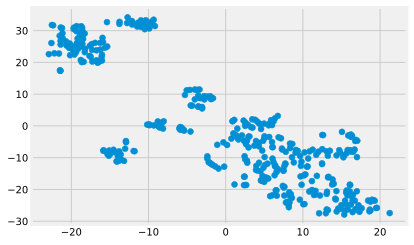

In [50]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

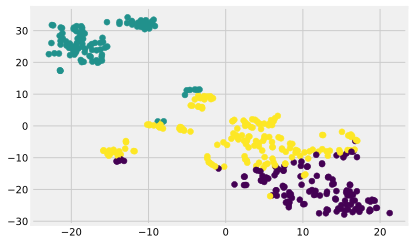

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)


plt.show()

In [36]:
print('Кластер 0, average CRIM: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1, average CRIM: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2, average CRIM: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0, average CRIM: 0.09492952755905511
Кластер 1, average CRIM: 12.049776666666668
Кластер 2, average CRIM: 0.5670764534883717


In [37]:
print('Кластер 0, average price: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1, average price: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2, average price: {}'.format(y_train[labels_train == 2].mean()))

Кластер 0, average price: 27.934645669291342
Кластер 1, average price: 15.513333333333334
Кластер 2, average price: 22.805232558139537


## Задание 3 *
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [25]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

print('До:\t{}'.format(X_test_scaled.shape))
print('После:\t{}'.format(X_test_tsne.shape))

До:	(102, 13)
После:	(102, 2)


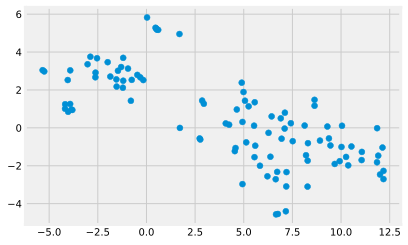

In [48]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])


plt.show()

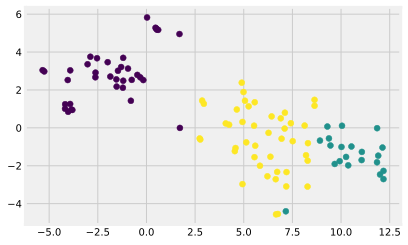

In [47]:
labels_test = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [45]:
print('Кластер 0, average CRIM: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1, average CRIM: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2, average CRIM: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0, average CRIM: 11.678834864864864
Кластер 1, average CRIM: 0.0845195238095238
Кластер 2, average CRIM: 0.4484402272727273


In [46]:
print('Кластер 0, average price: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1, average price: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2, average price: {}'.format(y_test[labels_test == 2].mean()))

Кластер 0, average price: 18.15945945945946
Кластер 1, average price: 28.619047619047613
Кластер 2, average price: 23.400000000000002
